ფექეჯების იმპორტი:
numpy - გამოთვებისთვის
ppylot - ანალიზისთვის

In [27]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

training პარამეტრების ინიციალიზაცია
EPISODES - ტრენინგის რაოდენობა, უნდა იყოს მინიმუმ 10000 რადგან EPSILON_DECAY_RATE არის 0.0001
EPSILON_DECAY_RATE - რომ რენდომ ექშენები აღარ აკეთოს აგენტმა და q ცხრილი გამოიყენოს

In [28]:
EPISODES = 15000
LEARNING_RATE = 0.9
DISCOUNT_FACTOR = 0.9
EPSILON_DECAY_RATE = 0.0001

გარემოს ინიციალიზაცია
map_name - 8x8 სამყაროს ვიყენებ. 
is_slippery - ალბათობრივი ექშენის ცვლადი, ანუ რომელიმე ექშენის გაკეთება, აუცილებლად ამ ექშენის შედეგს არ მოგვცემს.
render_mode - დავინახოთ თუ არა ანიმაცია

In [29]:
render_mode_enabled = False

In [30]:
env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render_mode_enabled else None)

q_values გრიდი იქნება 64x4-ზე, რადგან 64 სთეითი გვაქვს და 4 ექშენი

In [31]:
q_values = np.zeros((env.observation_space.n, env.action_space.n))

ეფსილონი თავიდან 1, რადგან გვინდა თავიდან სულ რენდომ ექშენები აკეთოს და ნელ-ნელა გამოიყენოს q ცხრილი.
random_generator - რენდომ გენერატორი რომ დავითვალოთ, ალბათობა რომ რენდომ ექშენი გააკეთოს და არა q ცხრილი გამოიყენოს

In [32]:
epsilon = 1
random_generator = np.random.default_rng()

reward_found_in_episode გვეხმარება გრაფის აგებისთვის და ანალიზისთვის, ტრეგნინგისას იპოვა თუ არა რევარდი.

In [33]:
reward_found_in_episode = np.zeros(EPISODES)

reset აბრუნებს აგენს საწყის 0,0 კოორდინატზე. 0-63 სტეტს აბრუნებს და ჩვენ 0 გვაინტერესებს.

ტერმინაციის ცვლდადები:
terminated - ჩავარდა ტბაში
lost - ძალიან ბევრი იბოდიალა აგენტმა და ვერაფერს მიაღწია (2000 სთეფი)

სანამ არ დაიკარგება ან არ ჩავარდება ექშენს აკეთებს. ეს ხდება episodes ჯერ.

action: 0 - მარცხნივ, 1 - ქვემოთ, 2 - მარჯვნივ, 3 - ზემოთ

reward - 1 თუ მიაღწია საჩუქარს, 0 წინააღმდეგ შემთხვევაში


if random_action_prob.random() < epsilon:
    action = env.action_space.sample()
else:
    action = np.argmax(q[state, :])

ეფსილონის მიხედვით ან რენდომ ექშენს ვაკეთებთ ან q ცხრილს ვიყენებთ


q_values[state, action] = q_values[state, action] + LEARNING_RATE * (
        reward + DISCOUNT_FACTOR * np.max(q_values[new_state,:]) - q_values[state,action]
    )
ეს ფორმულა ააფდეითებს არსებულ state,action წყვილის ველიუს რევარდის და ახალი სტეიტის მაქსიმალური q valueს მიხედვით.

ყველა ტრენინგის მერე ეფსილონს ვამცირებთ სანამ 0 არ გახდება, რომ q ცხრილი გამოიყენოს აგენტმა.

როცა მხოლოდ q თეიბლს იყენებს leaning_rate შევამციროთ რომ დასტაბილურდეს q ცხრილი.

[[0.22876792 0.25418658 0.25418658 0.22876792]
 [0.22876792 0.28242954 0.28242954 0.25418658]
 [0.25418658 0.3138106  0.3138106  0.28242954]
 [0.28242954 0.34867844 0.34867844 0.3138106 ]
 [0.3138106  0.38742049 0.38742049 0.34867844]
 [0.34867844 0.43046721 0.43046721 0.38742049]
 [0.38742049 0.4782969  0.4782969  0.43046721]
 [0.43046721 0.531441   0.4782969  0.4782969 ]
 [0.25418658 0.28242954 0.28242954 0.22876792]
 [0.25418658 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844 0.28242954]
 [0.3138106  0.         0.38742049 0.3138106 ]
 [0.34867844 0.43046721 0.43046721 0.34867844]
 [0.38742049 0.4782969  0.4782969  0.38742049]
 [0.43046721 0.531441   0.531441   0.43046721]
 [0.4782969  0.59049    0.531441   0.4782969 ]
 [0.28242954 0.3138106  0.3138106  0.25418658]
 [0.28242954 0.34867844 0.34867844 0.28242954]
 [0.3138106  0.38742049 0.         0.3138106 ]
 [0.         0.         0.         0.        ]
 [0.         0.4782969  0.4782969  0.38742049]
 [0.43046721 

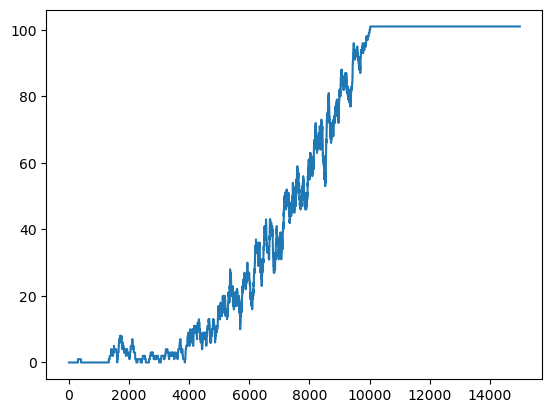

In [34]:
for episode in range(EPISODES):
    state = env.reset()[0]

    terminated = False
    lost = False

    while(not terminated and not lost):
        
        if random_generator.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_values[state, :])
        
        new_state, reward, terminated, lost, _ = env.step(action)

        q_values[state, action] = q_values[state, action] + LEARNING_RATE * (
            reward + DISCOUNT_FACTOR * np.max(q_values[new_state,:]) - q_values[state,action]
        )
        
        state = new_state

    
    epsilon = max(epsilon - EPSILON_DECAY_RATE, 0)

    if epsilon == 0:
        LEARNING_RATE = 0.0001

    if reward == 1:
        reward_found_in_episode[episode] = 1

rewards_graph = np.zeros(EPISODES)

for episode in range(EPISODES):
    rewards_graph[episode] = np.sum(reward_found_in_episode[max(0, episode - 100) : (episode + 1)])

plt.plot(rewards_graph)
print(q_values)

იგივე გავუშვათ ოღონდ is_slippery ფლეგი გავუსეტოთ, რაც ნიშნავს რომ 1/3 ალბათობით გადავა აგენტი არჩეული ექშენის შედეგზე.

[[1.28410198e-04 1.30427362e-04 5.10252600e-04 5.00133060e-03]
 [1.27604507e-04 1.38211905e-04 7.35447088e-03 5.20183173e-04]
 [1.94088180e-04 2.66906691e-04 9.13649300e-03 1.85589079e-04]
 [5.38325442e-04 5.57880465e-04 5.97465482e-03 6.72997129e-04]
 [6.96215354e-04 6.30127406e-04 7.47027004e-04 5.02283830e-03]
 [1.35175027e-03 1.29250246e-03 5.26721554e-03 1.47853058e-03]
 [4.07942487e-03 4.11077428e-03 1.39570177e-02 3.33519645e-03]
 [4.25980862e-03 4.06431287e-03 7.68286518e-03 4.20968009e-03]
 [1.22367082e-04 1.26236132e-04 3.19929333e-03 1.31438226e-04]
 [1.34616638e-04 1.38143561e-04 2.96790451e-04 7.03062547e-03]
 [1.28071376e-04 1.55042048e-04 1.38704381e-04 7.76836165e-03]
 [1.81870778e-04 3.36763733e-04 4.94320146e-04 7.86780466e-03]
 [2.66656600e-04 1.91440189e-04 6.07102038e-04 1.22375415e-02]
 [1.26254807e-03 1.16307026e-03 5.27264852e-03 1.01522362e-03]
 [2.98276617e-03 4.32017250e-03 1.44580918e-02 4.29635916e-03]
 [4.83434176e-03 1.42015441e-02 5.10813851e-03 4.474457

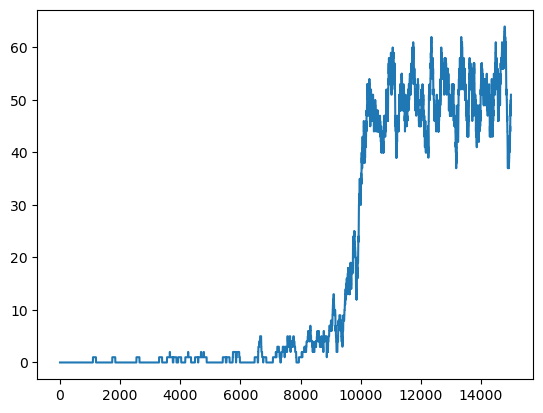

In [47]:
env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='human' if render_mode_enabled else None)
q_values = np.zeros((env.observation_space.n, env.action_space.n))
epsilon = 1
reward_found_in_episode = np.zeros(EPISODES)
LEARNING_RATE = 0.9

for episode in range(EPISODES):
    state = env.reset()[0]

    terminated = False
    lost = False

    while(not terminated and not lost):
        
        if random_generator.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_values[state, :])
        
        new_state, reward, terminated, lost, _ = env.step(action)

        q_values[state, action] = q_values[state, action] + LEARNING_RATE * (
            reward + DISCOUNT_FACTOR * np.max(q_values[new_state,:]) - q_values[state,action]
        )
        
        state = new_state

    
    epsilon = max(epsilon - EPSILON_DECAY_RATE, 0)

    if epsilon == 0:
        LEARNING_RATE = 0.0001

    if reward == 1:
        reward_found_in_episode[episode] = 1

rewards_graph = np.zeros(EPISODES)

for episode in range(EPISODES):
    rewards_graph[episode] = np.sum(reward_found_in_episode[max(0, episode - 100) : (episode + 1)])

plt.plot(rewards_graph)
print(q_values)

დავხუროთ გარემო

In [36]:
env.close()